# Monte Carlo Simulation for Statistical Properties

## (a) Bias and Mean Squared Error of Estimators
Population: Normal(mu, sigma^2). Compare sample mean and variance estimators.

In [1]:
import numpy as np
B = 10000
mu, sigma = 10, 2
n1, n2 = 10, 30

def simulate(n):
    samples = np.random.normal(mu, sigma, (B,n))
    mean_est = samples.mean(axis=1)
    var_n = samples.var(axis=1, ddof=0)
    var_n1 = samples.var(axis=1, ddof=1)
    return mean_est, var_n, var_n1

m, v1, v2 = simulate(n1)
print('Bias mean:', m.mean()-mu)
print('MSE mean:', ((m-mu)**2).mean())
print('Bias var n:', v1.mean()-sigma**2)
print('Bias var n-1:', v2.mean()-sigma**2)

Bias mean: -0.003893280391849885
MSE mean: 0.40468796930006856
Bias var n: -0.40688075320536754
Bias var n-1: -0.00764528133929776


## (b) Power Curve of One-sample t-test

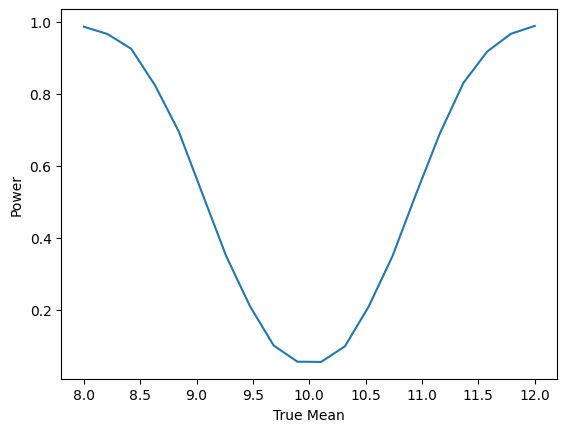

In [2]:
from scipy import stats
alpha = 0.05
n = 20
mu0 = 10
mu_vals = np.linspace(8,12,20)
B = 5000
power = []

for mu in mu_vals:
    rejections = 0
    for _ in range(B):
        x = np.random.normal(mu, 2, n)
        t,p = stats.ttest_1samp(x, mu0)
        if p < alpha:
            rejections += 1
    power.append(rejections/B)

import matplotlib.pyplot as plt
plt.plot(mu_vals, power)
plt.xlabel('True Mean')
plt.ylabel('Power')
plt.show()

## (c) Type I Error under Normality Violations

In [3]:
distributions = {
 'Normal': lambda n: np.random.normal(0,1,n),
 'Exponential': lambda n: np.random.exponential(1,n)-1,
 'Cauchy': lambda n: np.random.standard_cauchy(n)
}

alpha=0.05
n=20
B=5000

for name,gen in distributions.items():
    rej=0
    for _ in range(B):
        x = gen(n)
        t,p = stats.ttest_1samp(x,0)
        if p<alpha:
            rej+=1
    print(name,'Type I Error:', rej/B)

Normal Type I Error: 0.0466
Exponential Type I Error: 0.0802
Cauchy Type I Error: 0.0166
